### Ejercicio: Analisis del nacimiento de bebes en US

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

/Users/heinerleivagmail.com/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os
print(os.getcwd())
os.chdir("/Users/heinerleivagmail.com")

/Users/heinerleivagmail.com/Desktop/Machine Learning Specialization/Curso 4/Módulo 2


In [3]:
data = pd.read_csv("us-births.csv", delimiter = ",")
data.shape

(15547, 5)

In [4]:
data.head(5)

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [5]:
data.tail(5)

,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


In [6]:
data.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum')
# Resumen anual de nacimientos divididos entre hombres y mujeres, sin embargo es cansado de leer porque son muchos anos

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


### Feature Engineering

In [7]:
data['decade'] = (data['year']//10)*10

In [8]:
data.head(5)

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [9]:
data.pivot_table("births", index = "decade", columns = "gender", aggfunc = "sum")
# Con esto podemos ver que nacen mas hombres que mujeres. 

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [10]:
%matplotlib inline

In [11]:
sns.set()

Text(0, 0.5, 'Total de nacimientos por anno')

<Figure size 1080x1080 with 0 Axes>

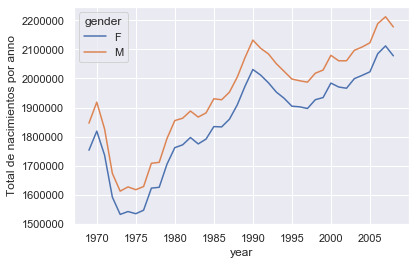

In [12]:
plt.figure(figsize = (15,15))
data.pivot_table('births', index = "year", columns = "gender", aggfunc = "sum").plot();
plt.ylabel("Total de nacimientos por anno")

In [13]:
quantiles = np.percentile(data['births'], [25,50, 75])
quantiles

array([4358. , 4814. , 5289.5])

In [14]:
# Analizando desde el punto de dispersion de los datos 
median = quantiles[1]
IQR = quantiles[2]-quantiles[0]
sigma = 0.75*IQR

### Eliminando atipicos

En este caso se va a eliminar todos aquellos datos que se alejen de la distribucion normal de los datos que se alejan hasta en 5 veces tanto del primer cuartil como del tercer cuartil.

In [15]:
data = data.query("(births > @median - 5*@sigma) & (births < @median + 5*@sigma)")

In [16]:
data.shape

(14610, 6)

In [17]:
data['day'] = data['day'].astype(int)

In [18]:
data.head(5)

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


### Creando estructura de datos para series de tiempo

In [19]:
data.index = pd.to_datetime(10000*data.year+100*data.month+data.day, format = "%Y%m%d")

In [20]:
data.head(5)

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960
1969-01-02,1969,1,2,M,4548,1960
1969-01-03,1969,1,3,F,4548,1960


In [21]:
data['dayofweek'] = data.index.dayofweek

In [22]:
data.head(5)

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


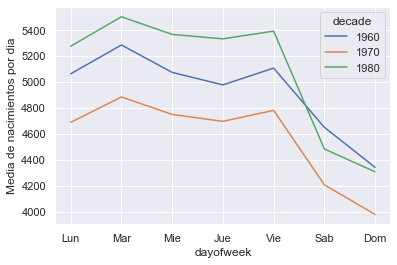

In [23]:
# Media de nacimientos por dia de la semana, donde 0 es lunes y 6 es domingo. 
data.pivot_table('births', index = "dayofweek", columns = 'decade', aggfunc = "mean").plot();
plt.gca().set_xticklabels(['',"Lun", "Mar", "Mie", "Jue", "Vie", "Sab", "Dom"])
plt.ylabel("Media de nacimientos por dia")
plt.show()

# Podemos ver que los martes es el dia de la semana en que mas nacen bebes y el sabado y domingo en que nacen menos
# Ojo que hay un monton de NAs, no existen datos de 1990 hacia adelante.

In [24]:
data_by_data = data.pivot_table("births", index = [data.index.month, data.index.day], aggfunc = "mean")

In [25]:
data_by_data.head(10)
# para el dia 1 del mes 1 se obtienen de media 4009 nacimientos, para el dia 2 del mes 1, 4247 de media, etc (...)

births
1 1   4009.225
  2   4247.400
  3   4500.900
  4   4571.350
  5   4603.625
  6   4668.150
  7   4706.925
  8   4629.650
  9   4537.775
  10  4591.700

### Operando matriz a tensor

In [26]:
# Extrayendo datos con fechas y annos.
# Tomando en cuenta annos bisiestos para hacer la transformacion multidimensional
data_by_data.index = [pd.datetime(2020, month, day)
                     for (month, day) in data_by_data.index]

/Users/heinerleivagmail.com/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
data_by_data.head()

,births
2020-01-01,4009.225
2020-01-02,4247.400
2020-01-03,4500.900
2020-01-04,4571.350
2020-01-05,4603.625


<Figure size 864x288 with 0 Axes>

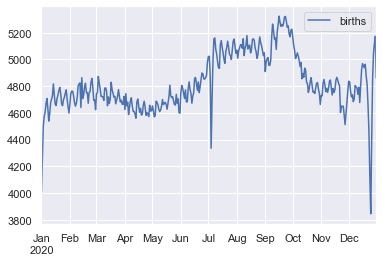

In [31]:
plt.figure(figsize = (12,4))
data_by_data.plot()
plt.show()

# Los nacimientos de los bebes se pueden ver que caen en 4 de julio, navidad y anno nuevo, es decir 
# los nacimientos en USA son inducidos para que no queden en dias festivos. 